In [6]:
#!pip install fsspec
#!pip install s3fs
#!pip install boto

import pandas as pd
import boto

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import CCA

# import the csv file directly from an s3 bucket
data = pd.read_csv('https://articledatas3.s3.eu-central-1.amazonaws.com/CanonicalCorrelationAnalysisData.csv')

In [7]:
print(data)

# Split the data in X and Y
X = data[['PsychTest1',	'PsychTest2', 'YrsEdu', 'IQ', 'HrsTrn', 'HrsWrk']]
Y = data[['ClientSat',	'SuperSat',	'ProjCompl']]

# Instantiate the Canonical Correlation Analysis with 2 components
my_cca = CCA(n_components=2)

# Fit the model
my_cca.fit(X, Y)

     PsychTest1  PsychTest2  YrsEdu   IQ  HrsTrn  HrsWrk  ClientSat  SuperSat  \
0            62          78       5   97       6      33         84        59   
1            46          27       2   93       7      54         55        38   
2            68          75       2   96       5      47         70        68   
3            55          56       4  103       7      80         63        81   
4            51          32       4   98       5      53         55        39   
..          ...         ...     ...  ...     ...     ...        ...       ...   
995          55          38       5  103       9      56         70        56   
996          53          43       5   99       7      44         68        47   
997          41          49       3   94       3      36         39        41   
998          52          54       2  102       8      70         58        69   
999          38          18       0  100      14     100         44        65   

     ProjCompl  
0         

CCA()

8
8
8
8
8
8
8
8
8


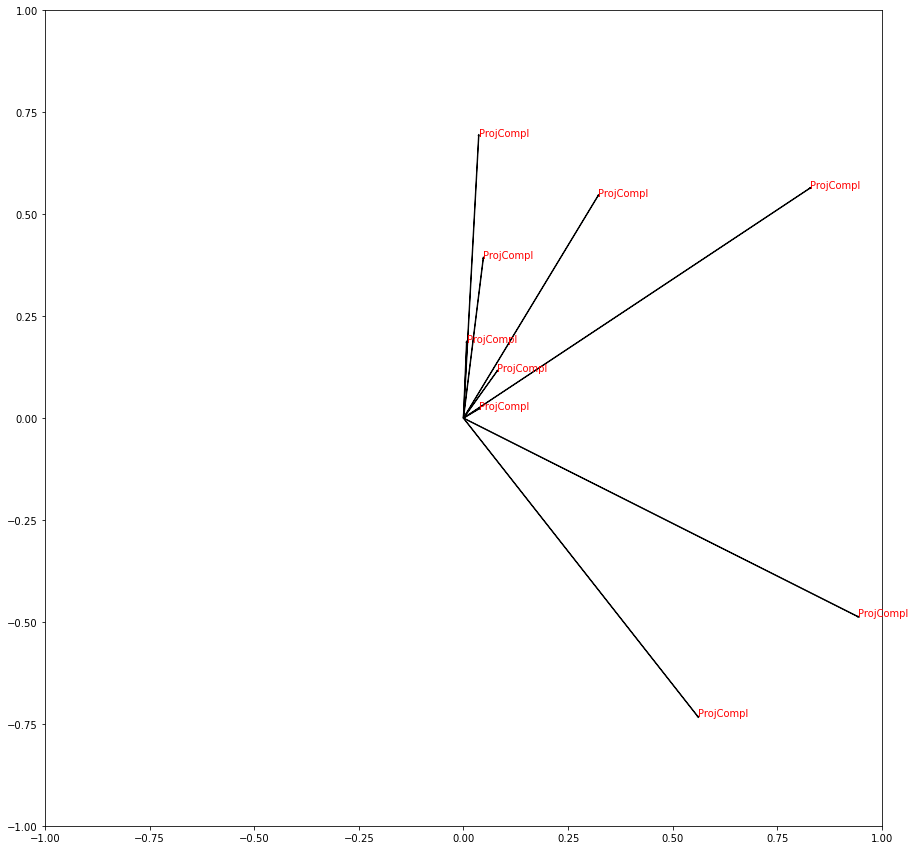

In [21]:
# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_

# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))

# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
  x = xyrot[var_i,0]
  y = xyrot[var_i,1]

  plt.arrow(0,0,x,y)
  print(i)
  #for i in range (len(data.columns)):
  #    if i >= 6:
  #        plt.text(x,y,data.columns[i], color='red')
  #    else:
  #        plt.text(x,y,data.columns[i], color='blue')
  plt.text(x,y,data.columns[i], color='red' if i >= 6 else 'blue')
  

plt.show()